In [1]:
import adios2
import h5py
import numpy as np
import pandas as pd
import xarray as xr
from adios2toolspy import SuperCell, Particles, Fields
from h5toolspy import H5Processor
from picplot import fieldGrid, histGrid
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-29/run2Dratio01TripleNI1000/'

Loading hx_fc from File: tfd.029000.xdmf


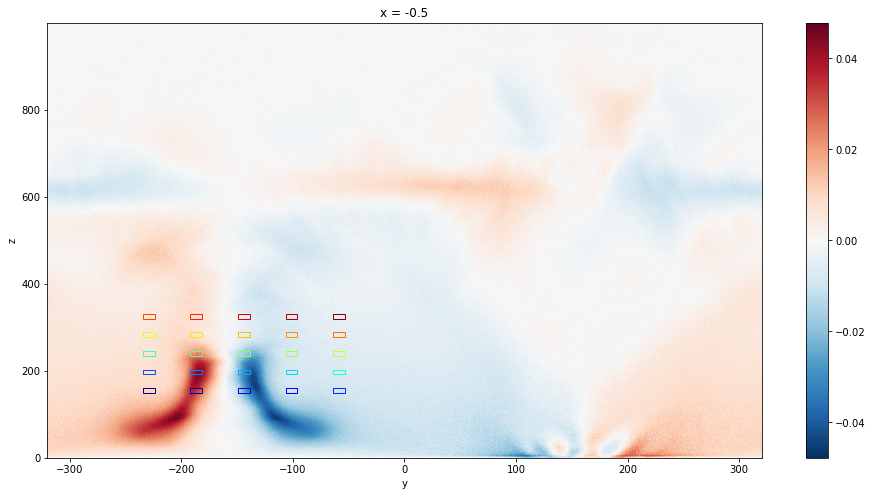

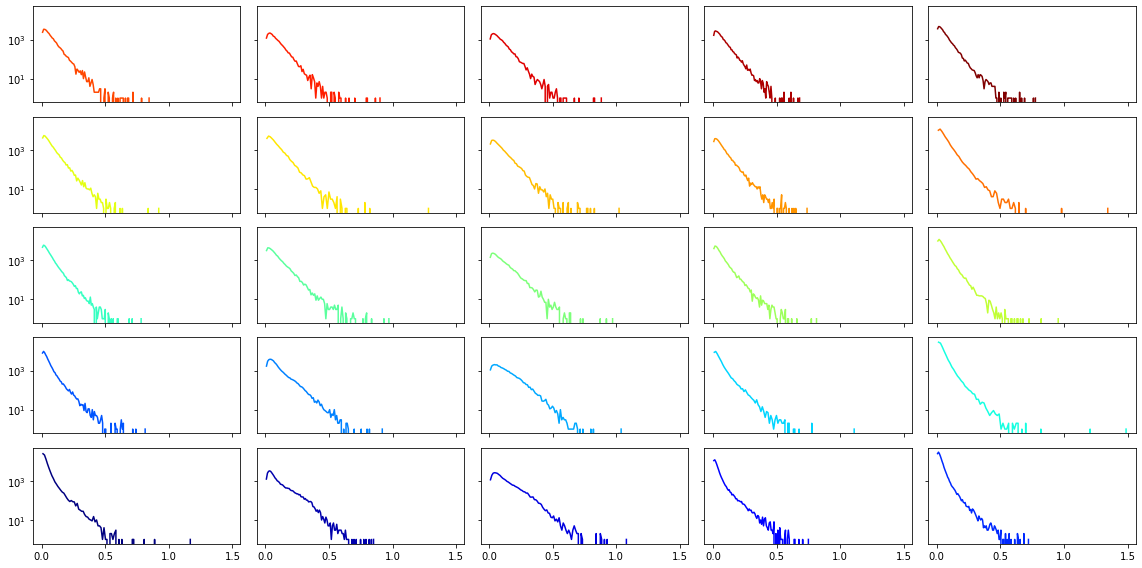

In [3]:
origin = (-232,150)
histGrid(root, 'hx_fc', -1 , (5, 5), origin, cellsPerPatch=32, zrange=(0,1000), spacing=3)

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_figure'

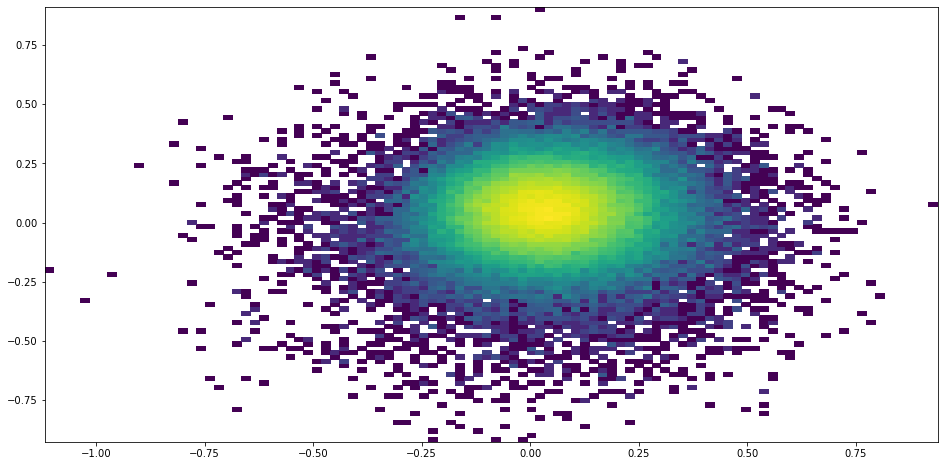

In [4]:
time = '29000'
path = root + 'checkpoint_' + time + '.bp'
patch = np.array((2,0))*32 + origin
numPatches = 1
cellsPerPatch=32
nrows, ncols = 1, 1
spacing = 1
h5p = H5Processor(root)
corners, numPatches = h5p.getPatches(origin, nrows=nrows, ncols=ncols, cellsPerPatch=cellsPerPatch, spacing=spacing)

SC = SuperCell(path, corners[0], patches=numPatches, species='electron', cellsPerPatch=cellsPerPatch)
SC.histogram2D(100)

In [ ]:
fig, axes = plt.subplots(4,3, squeeze=False)
for i in range(4):
    for j in range(3):
        time = (i*3+j)*1000 + 17000
        path = root + 'checkpoint_' + str(time) + '.bp'
        SC = SuperCell(path, corners[0], patches=numPatches, species='electron', cellsPerPatch=cellsPerPatch)
        SC.histogram2D(100, axes[i,j], fig)

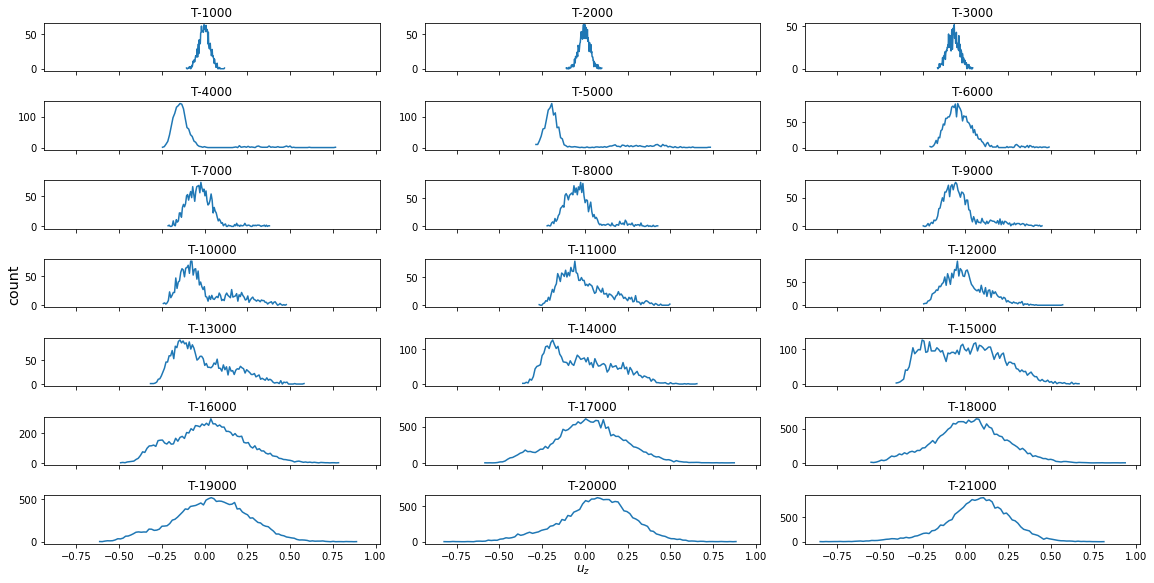

In [27]:
fig, axes = plt.subplots(7,3, squeeze=False, sharex=True)
for i in range(7):
    for j in range(3):
        time = (i*3+j)*1000+1000
        path = root + 'checkpoint_' + str(time) + '.bp'
        SC = SuperCell(path, corners[0], patches=numPatches, species='electron', cellsPerPatch=cellsPerPatch)
        h = SC.histogramV(100, dim='z')
        axes[i,j].plot(h[1][:-1], h[0])
        axes[i,j].set_title(f'T-{time}')
fig.tight_layout()

fig.text(0.5, 0.0, r'$u_z$', ha='center', fontsize='large')
fig.text(0.0, 0.5, 'count', va='center', rotation='vertical', fontsize='x-large')
#fig.savefig('Uz-Evolution.png')

In [22]:
path = root + 'checkpoint_' + '10000' + '.bp'
SC = SuperCell(path, corners[0], patches=numPatches, species='electron', cellsPerPatch=cellsPerPatch)
h = SC.histogramV(100, dim='z')
SC.residents.to_csv('toy_data.csv')

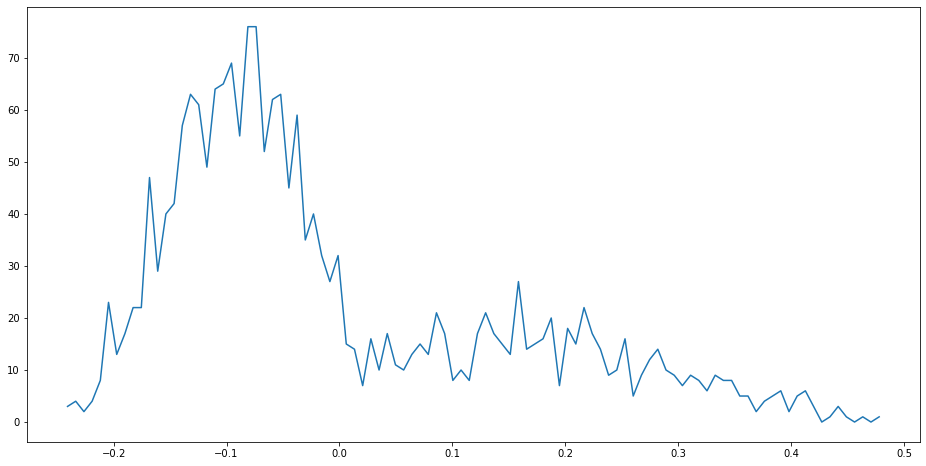

In [23]:
plt.plot(h[1][:-1], h[0])